In [19]:
# creating paths to src and data folders in the repo
import sys
import pathlib
src_path = pathlib.Path().absolute().parent.parent / "src"
data_path = pathlib.Path().absolute().parent.parent / "data"

# train test split paths
train_path = data_path / 'tts/train'
test_path = data_path / 'tts/test'
val_path = data_path / 'tts/val'

# add src path to sys.path so it is searched in import statements
sys.path.append(str(src_path))

# basic imports for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# silence max image size warning
from PIL import Image
Image.MAX_IMAGE_PIXELS = 1000000000 

# import modeling packages
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# modeling metrics
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

changes to data generators:
    
    train batch_size 20

In [2]:
train_generator = ImageDataGenerator().flow_from_directory(str(train_path),
                                                           target_size=(150, 150),
                                                           batch_size=20,
                                                           class_mode='categorical')
test_generator = ImageDataGenerator().flow_from_directory(str(test_path),
                                                          target_size=(150, 150),
                                                          batch_size=50,
                                                          class_mode='categorical',
                                                          shuffle=False)
val_generator = ImageDataGenerator().flow_from_directory(str(val_path),
                                                          target_size=(150, 150),
                                                          batch_size=109,
                                                          class_mode='categorical',
                                                          shuffle=False)

Found 4000 images belonging to 5 classes.
Found 500 images belonging to 5 classes.
Found 545 images belonging to 5 classes.


changes to model architecture:
        
    1st conv2d num_filters 30 -> 35
    
    1st dense layer dropout .25 -> .2
    
    dense layers 2

In [3]:
model = models.Sequential()
model.add(layers.Conv2D(35, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(30, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(40, activation='relu'))
model.add(layers.Dropout(.2))
model.add(layers.Dense(40, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 35)      980       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 35)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 30)        9480      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 30)        0         
_________________________________________________________________
flatten (Flatten)            (None, 38880)             0         
_________________________________________________________________
dense (Dense)                (None, 40)                1555240   
_________________________________________________________________
dropout (Dropout)            (None, 40)                0

changes to fit:
    
    epochs 4 -> 6

In [5]:
model.fit(
        train_generator,
        steps_per_epoch=200,
        epochs=6,
        validation_data=test_generator,
        validation_steps=10)

Epoch 1/6
 48/200 [======>.......................] - ETA: 6:02 - loss: 17.3661 - accuracy: 0.2406

/opt/anaconda3/envs/capstone-env/lib/python3.6/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


200/200 [==============================] - 556s 3s/step - loss: 5.3637 - accuracy: 0.2770 - val_loss: 1.5925 - val_accuracy: 0.2480
Epoch 2/6
200/200 [==============================] - 560s 3s/step - loss: 1.5102 - accuracy: 0.3347 - val_loss: 1.6556 - val_accuracy: 0.3100
Epoch 3/6
200/200 [==============================] - 558s 3s/step - loss: 1.3952 - accuracy: 0.4325 - val_loss: 1.6210 - val_accuracy: 0.2440
Epoch 4/6
200/200 [==============================] - 555s 3s/step - loss: 1.2449 - accuracy: 0.5042 - val_loss: 1.6349 - val_accuracy: 0.3000
Epoch 5/6
200/200 [==============================] - 549s 3s/step - loss: 1.0173 - accuracy: 0.6240 - val_loss: 1.8502 - val_accuracy: 0.3040
Epoch 6/6
200/200 [==============================] - 543s 3s/step - loss: 0.8734 - accuracy: 0.6913 - val_loss: 1.9630 - val_accuracy: 0.3200


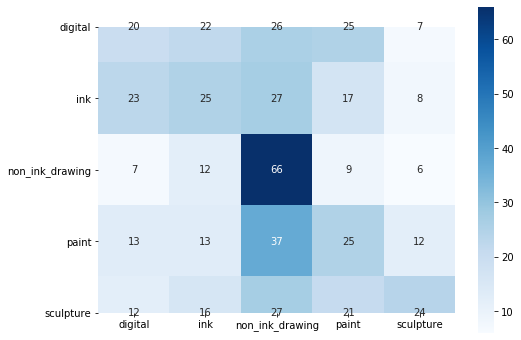

In [29]:
#conf_mat = confusion_matrix(test_generator.classes, np.argmax(model.predict(test_generator), axis=1))

#conf_mat

class_names = list(test_generator.class_indices.keys())

fig, ax = plt.subplots(figsize=(8,6))
model_7_path = pathlib.Path().absolute().parent.parent / 'reports/figures/mod_7_heatmap.png'
ax.set_ylim([0,1])
sns.heatmap(conf_mat, xticklabels=class_names, yticklabels=class_names, ax=ax, square=True, annot=True, cmap='Blues')
plt.savefig(model_7_path)

In [28]:
accuracies = []
for i in range(0, 5):
    acc = conf_mat[i][i] / sum(conf_mat[i])
    accuracies.append(acc)
accuracies

[0.2, 0.25, 0.66, 0.25, 0.24]